In [1]:
# Librerías
import pandas as pd
import numpy as np
from pathlib import Path
import os

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pickle

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
# Variables
src_path = os.getcwd()
data_path = "/data/raw/"
p_data_path = "/data/processed/"
data_file = "merged_data.csv"

file_path= Path(os.path.dirname(src_path)+data_path+data_file)


Importamos el archivo pickle creado tras la limpieza para pasar a realizar el análisis univariante sobre estos datos ya tratados.

In [4]:
p_data_file = Path(os.path.dirname(src_path)+p_data_path+'coffe_clean.pkl')

with open(p_data_file, 'rb') as handle:
    df = pickle.load(handle)


---

<h4 style="text-align: center;"><ins>1 - País de Origen</ins></h4>

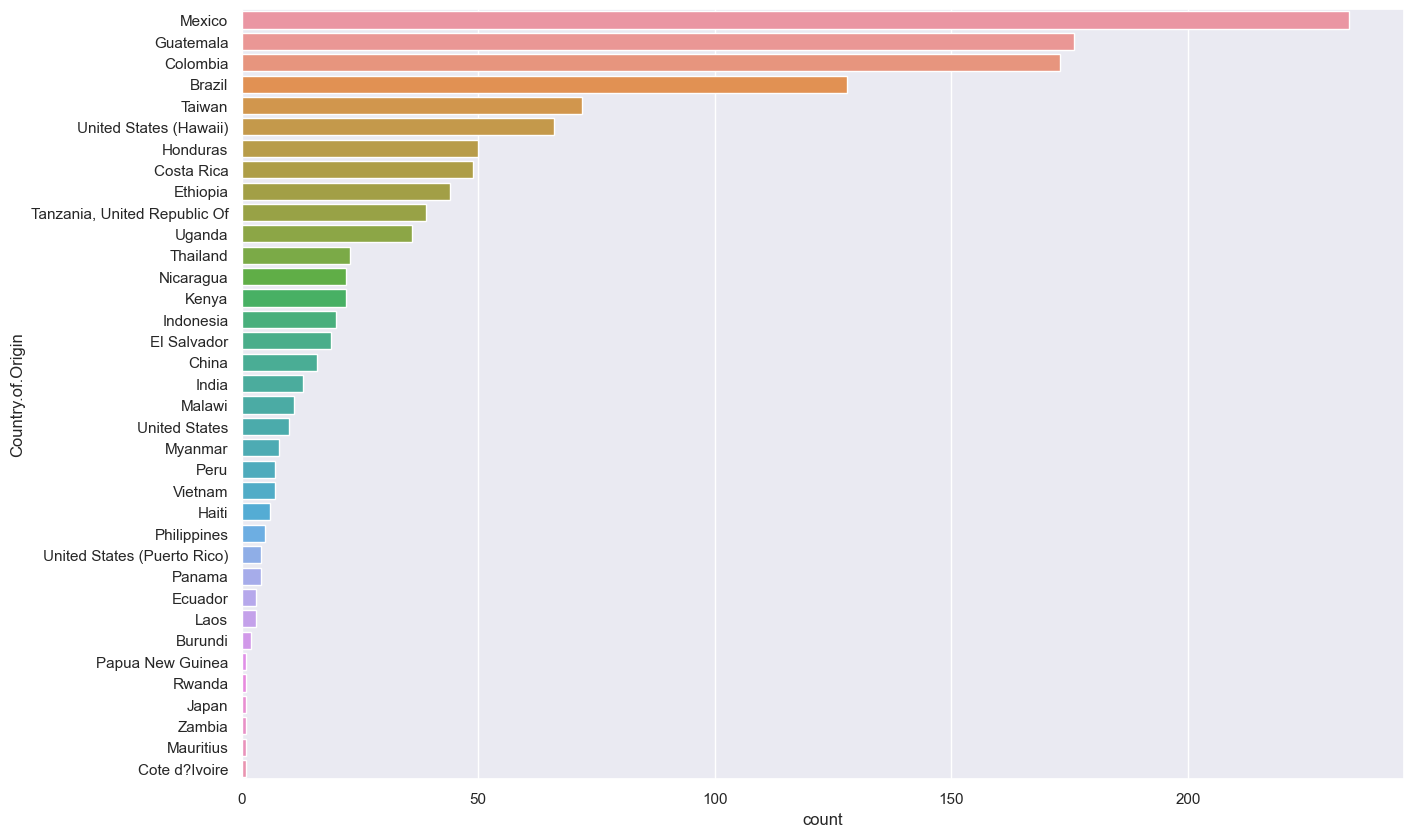

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, y="Country.of.Origin", order= df["Country.of.Origin"].value_counts().index, ax=ax)
plt.show()

Los principales países productores de café presentes en el dataset son centroamericanos, con algunos africanos en posiciones centrales y los asiáticos con muy poca representación.

<h4 style="text-align: center;"><ins>2 - Especie</ins></h4>

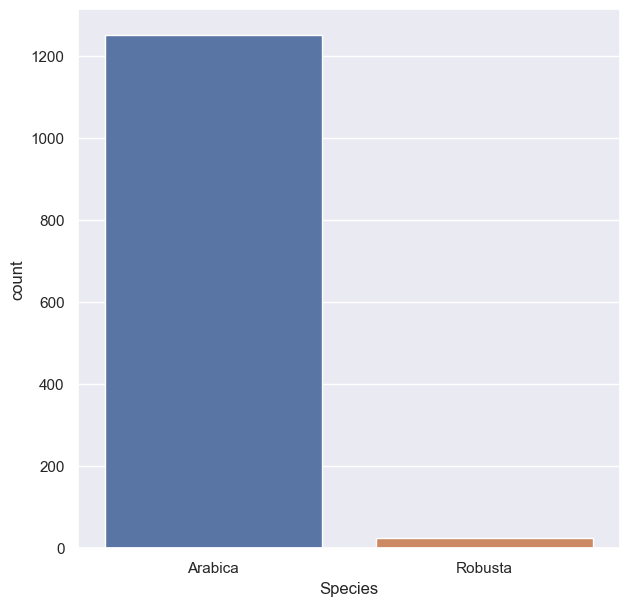

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=df, x="Species", order= df["Species"].value_counts().index, ax=ax)
plt.show()

El dataset está claramente poblado por más cantidad de registros de la especie "Arabica" que de la especie "Robusta".

Esto debe ser tenido en cuenta en el momento de la realización de predicciones, pues un desequilibrio tan grande afectará negativamente y ha de ser evitado.

<h4 style="text-align: center;"><ins>3 - Variedad</ins></h4>

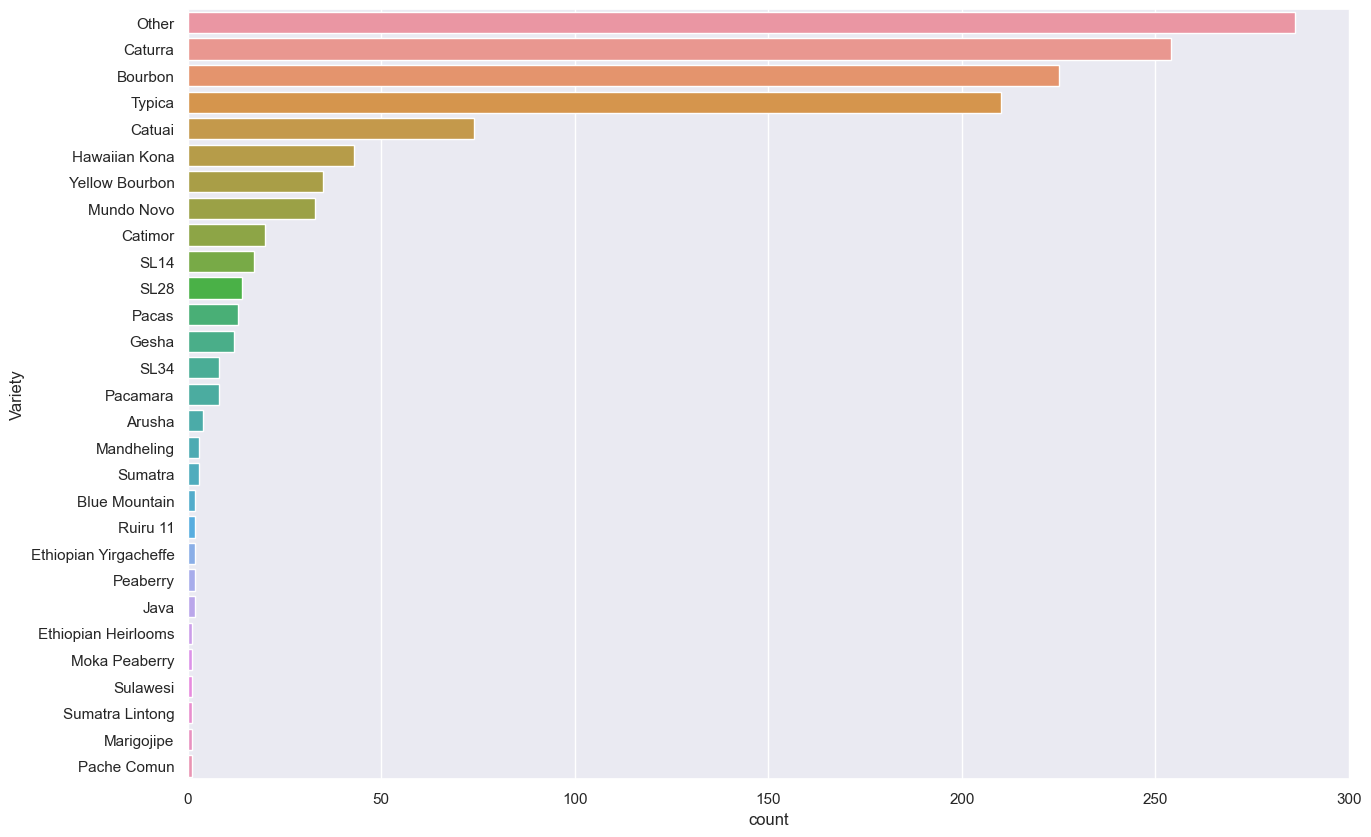

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, y="Variety", order= df["Variety"].value_counts().index, ax=ax)
plt.show()

La presencia de tantos registros sin un valor específico de la variedad de café cultivada nos afectará negativamente a la hora de predecir qué variedad es mejor, por lo que lo mejor sería no tener en cuenta este atributo en su momento, aunque vamos a mantenerlo durante el análisis.

<h4 style="text-align: center;"><ins>4 - Altitud</ins></h4>

En vez de graficar los valores de altitud media usaremos los grupos que hemos generado anteriormente a fin de simplificar el análisis.

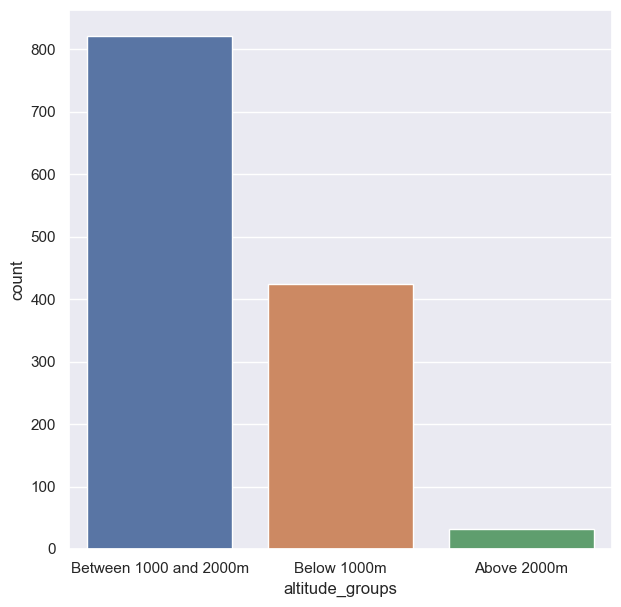

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=df, x="altitude_groups", order= df["altitude_groups"].value_counts().index, ax=ax)
plt.show()

Puede verse que una inmensa mayoría de las plantaciones se encuentran entre los 1000 y los 2000m de altura.

<h4 style="text-align: center;"><ins>5 - Método de procesado</ins></h4>

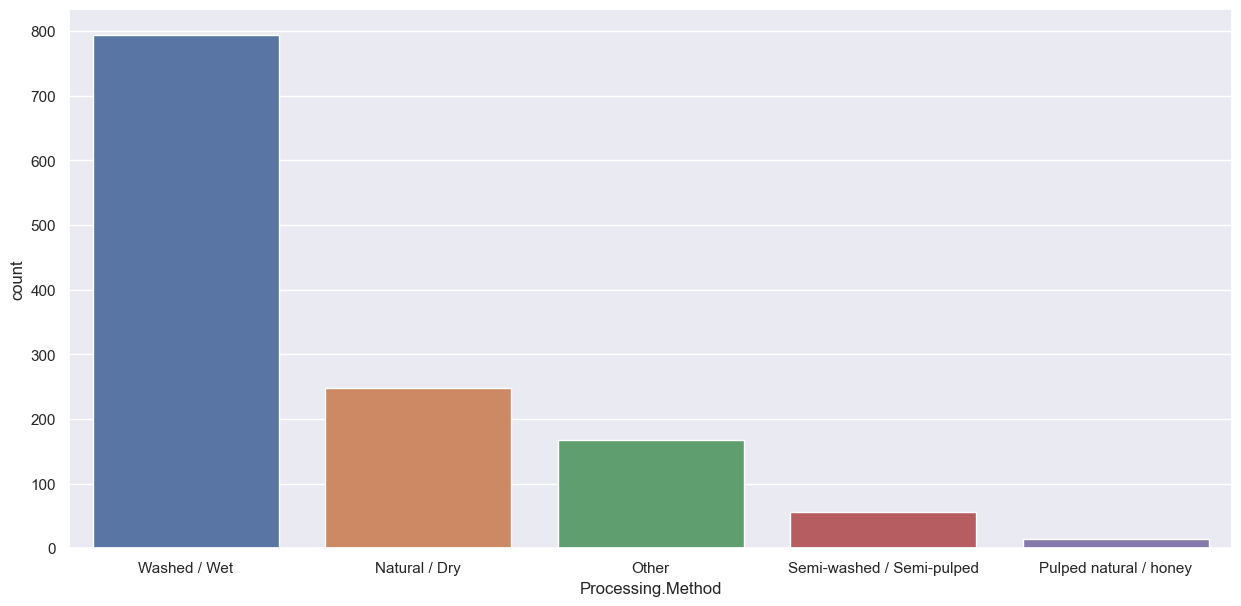

In [9]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Processing.Method", order= df["Processing.Method"].value_counts().index, ax=ax)
plt.show()

El método de procesamiento más habitual parece ser el de Lavado, siendo el secado natural el segundo; aunque muy por debajo.

<h4 style="text-align: center;"><ins>6 - Color</ins></h4>

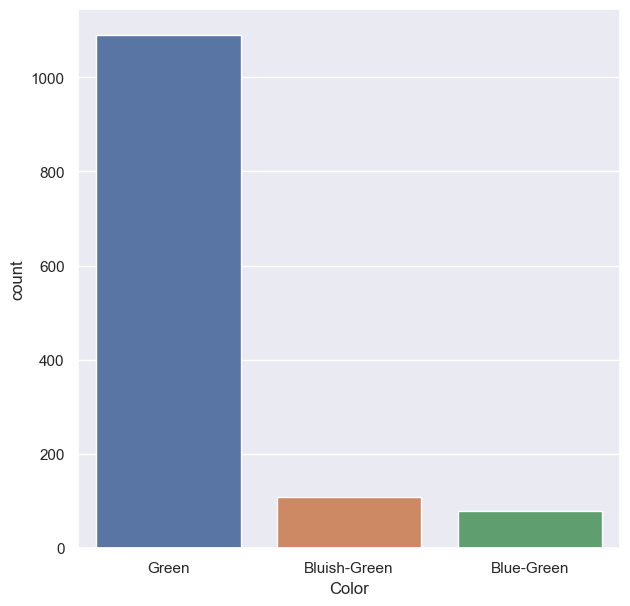

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=df, x="Color", order= df["Color"].value_counts().index, ax=ax)
plt.show()

Como era esperado, la mayor parte de las semillas de café presentan una coloración verde.

<h4 style="text-align: center;"><ins>7 - Quakers</ins></h4>

En vez de analizar la variable que lista todas las posibles ocurrencias, lo haremos con la versión agrupada.

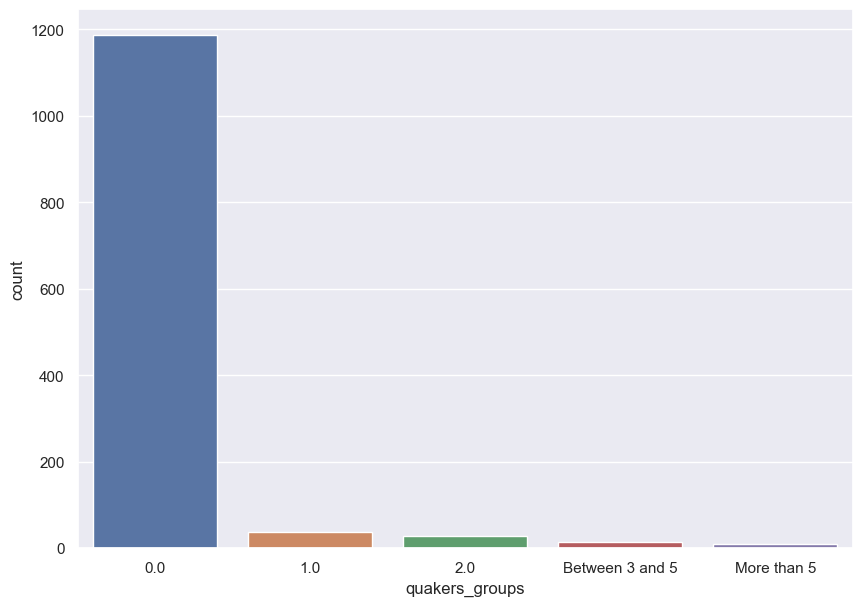

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(data=df, x="quakers_groups", order= df["quakers_groups"].value_counts().index, ax=ax)
plt.show()

Prácticamente todos los sacos de café estaban carentes de semillas inmaduras y no tostadas

<h4 style="text-align: center;"><ins>8 - Año de cosecha</ins></h4>

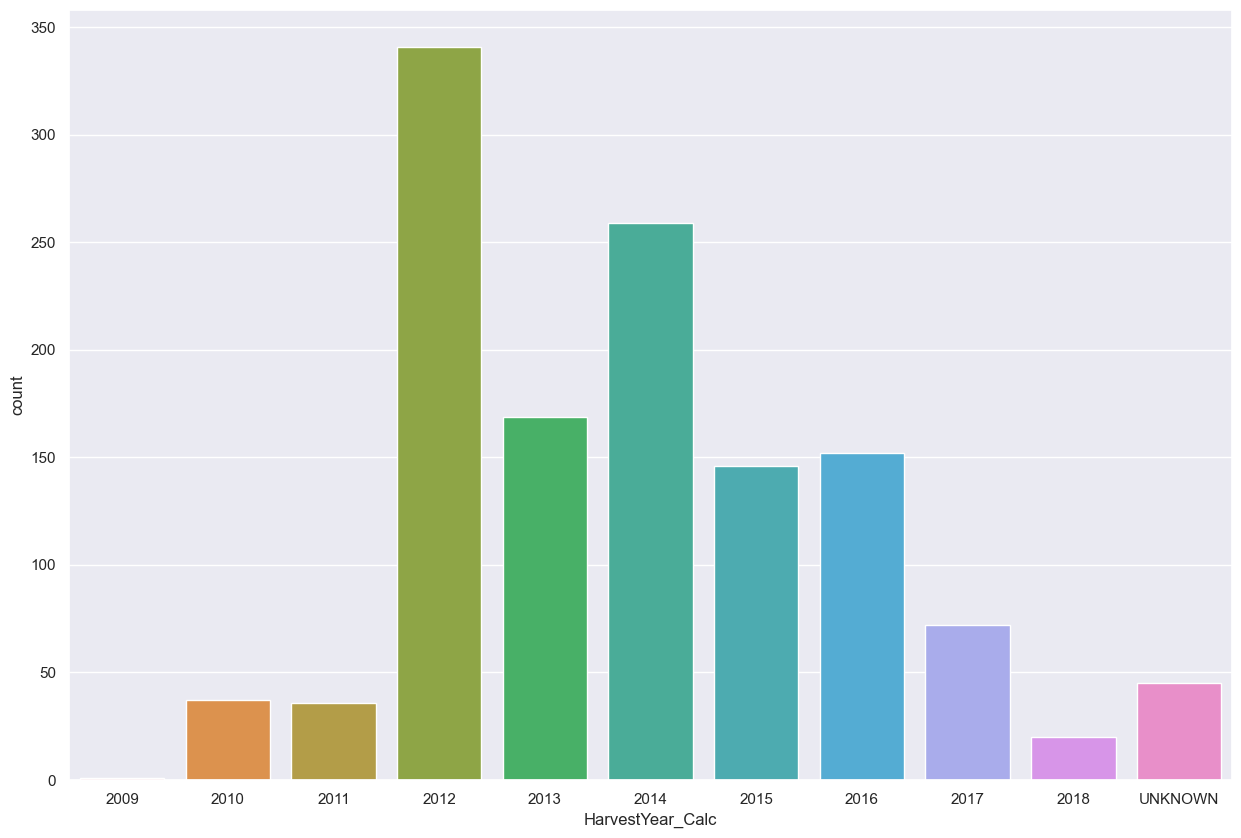

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df.sort_values(by=["HarvestYear_Calc"]), x="HarvestYear_Calc", ax=ax)
plt.show()

Casi el total de las semillas corresponden a cosechas entre el 2012 y el 2016, con un pequeño grupo del que desconocemos la fecha.

<h4 style="text-align: center;"><ins>10 - Aroma</ins></h4>

<Axes: xlabel='Aroma'>

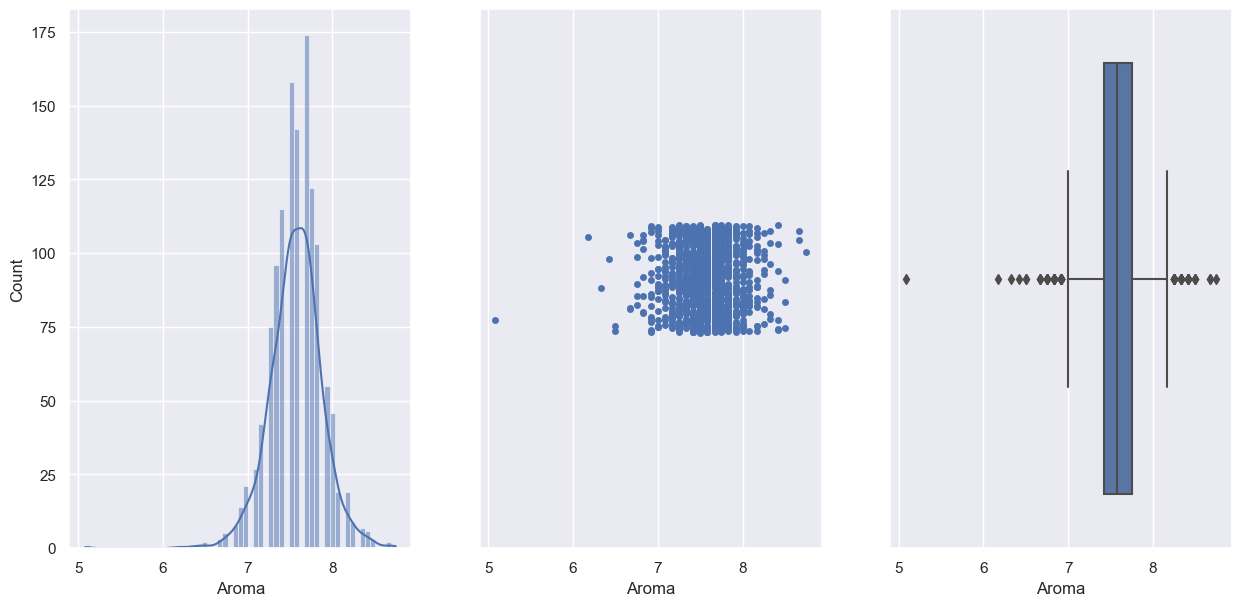

In [13]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Aroma", kde=True, ax=axs[0])
sns.stripplot(x=df["Aroma"], ax=axs[1])
sns.boxplot(data=df, x="Aroma", ax=axs[2])


Las gráficas de distribución y dispersión parecen indicar que la mayor parte de los valores para el aroma se encuentran en una puntuación entre 7 y 8, con algunos valores residuales por debajo de 6.5

De acuerdo al diagrama de caja, encontramos un valor potencialmente fuera de rango con una puntuación cercana al 5, aunque la consideramos válida.

<h4 style="text-align: center;"><ins>11 - Sabor</ins></h4>

<Axes: xlabel='Flavor'>

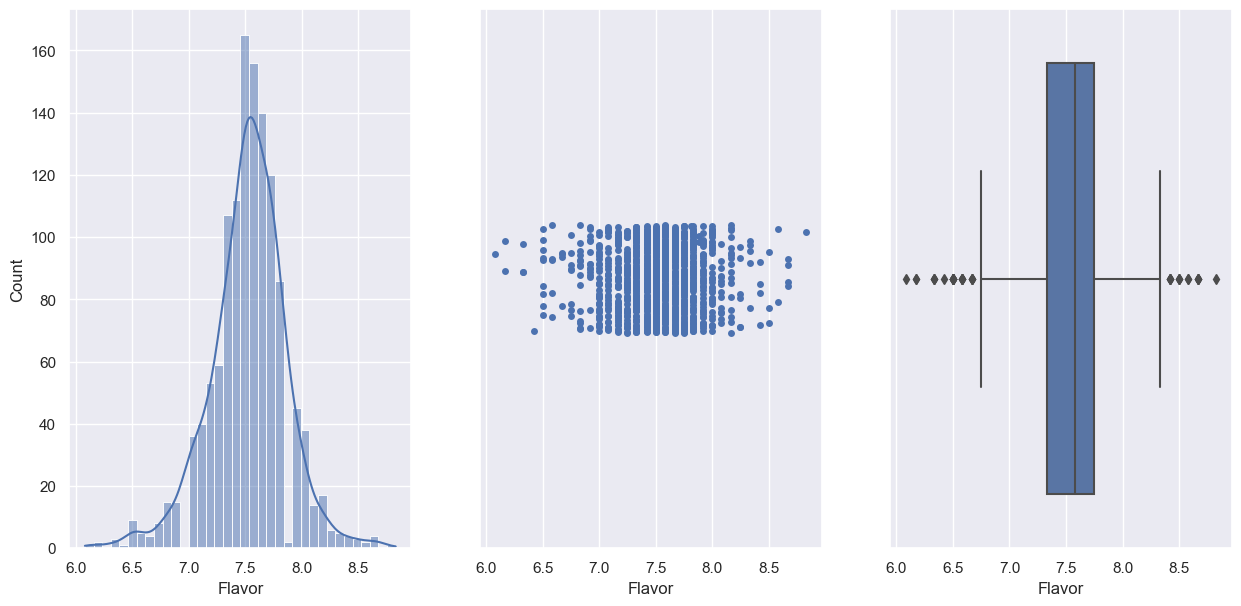

In [14]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Flavor", kde=True, ax=axs[0])
sns.stripplot(x=df["Flavor"], ax=axs[1])
sns.boxplot(data=df, x="Flavor", ax=axs[2])

Las gráficas de distribución y dispersión muestran que los valores de la variable Flavor se encuentran en la horquilla entre el 6 y el 8, con escasos valores potencialmente fuera de rango pero válidos dentro de la puntuación.

La mediana está ligeramente desplazada hacia el lado superior del rango intercuartílico.

<h4 style="text-align: center;"><ins>12 - Regusto</ins></h4>

<Axes: xlabel='Aftertaste'>

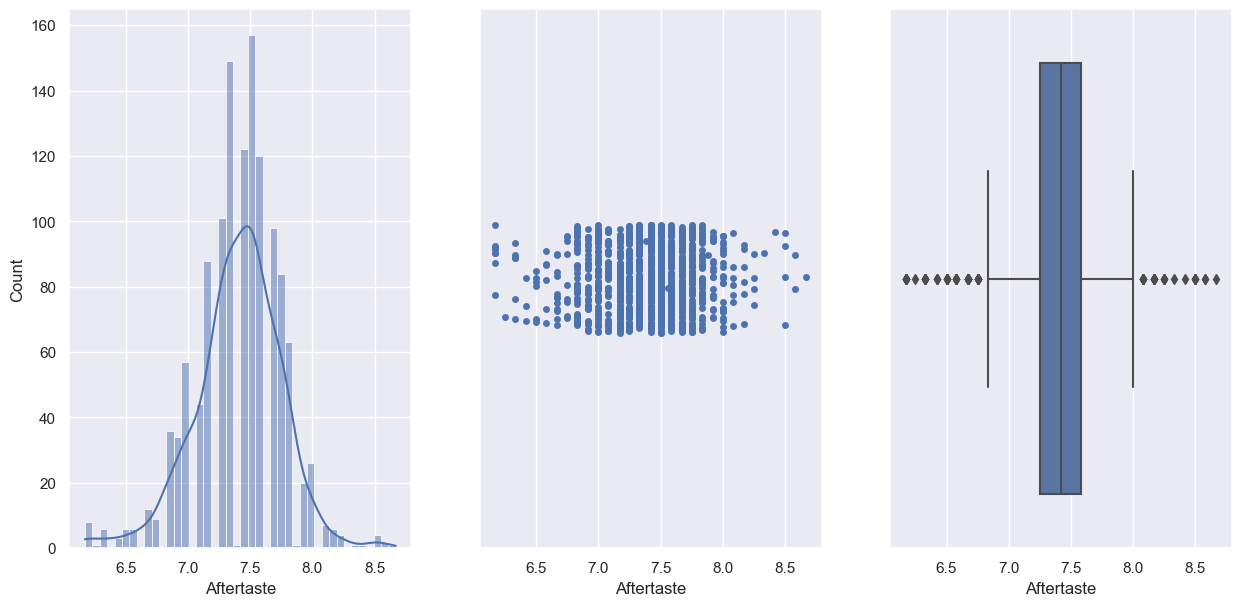

In [15]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Aftertaste", kde=True, ax=axs[0])
sns.stripplot(x=df["Aftertaste"], ax=axs[1])
sns.boxplot(data=df, x="Aftertaste", ax=axs[2])

Las gráficas de distribución y dispersión muestran que los valores de la variable Aftertaste también se encuentran en la horquilla entre el 6 y el 8, con algunos casos valores potencialmente fuera de rango pero válidos dentro de la puntuación.

La mediana está muy centrada en el rango intercuartílico, lo que refuerza la idea de que sigue una distribución próxima a la normal.

<h4 style="text-align: center;"><ins>13 - Cuerpo</ins></h4>

<Axes: xlabel='Body'>

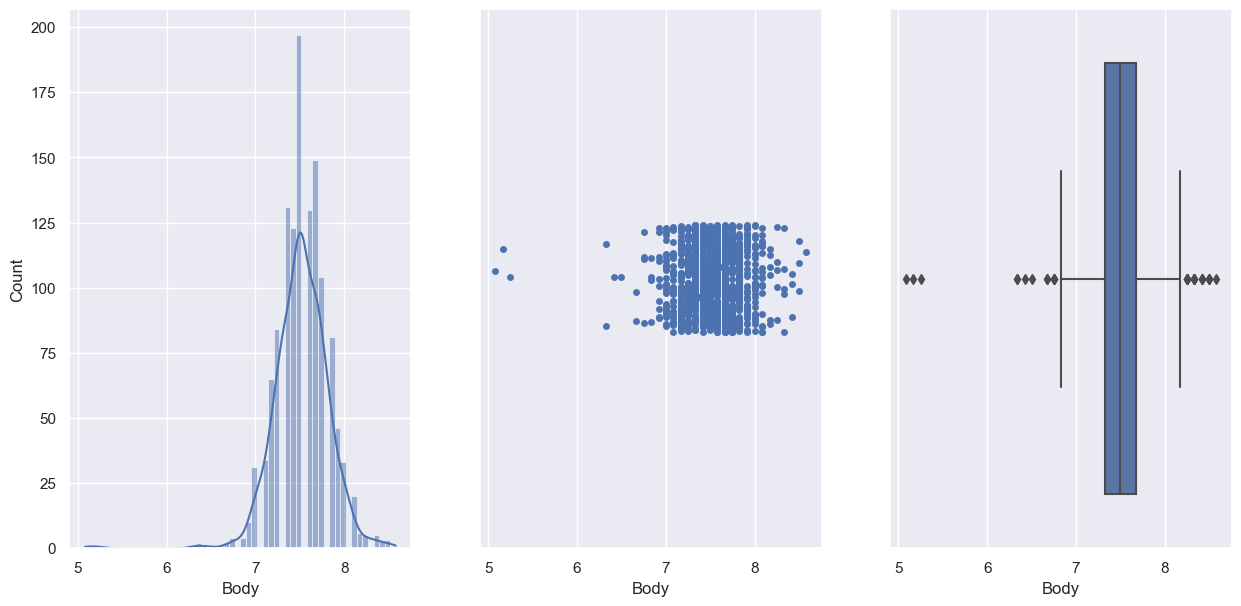

In [16]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Body", kde=True, ax=axs[0])
sns.stripplot(x=df["Body"], ax=axs[1])
sns.boxplot(data=df, x="Body", ax=axs[2])

De acuerdo a las gráficas de distribución y dispersión, los valores de la variable Body también se encuentran en la horquilla entre el 7 y el 8, con algunos potencialmente fuera de rango pero válidos dentro de la puntuación.

La mediana está casi centrada en el rango intercuartílico, lo que refuerza la idea de que sigue una distribución próxima a la normal.

<h4 style="text-align: center;"><ins>14 - Dulzor</ins></h4>

<Axes: xlabel='Sweetness'>

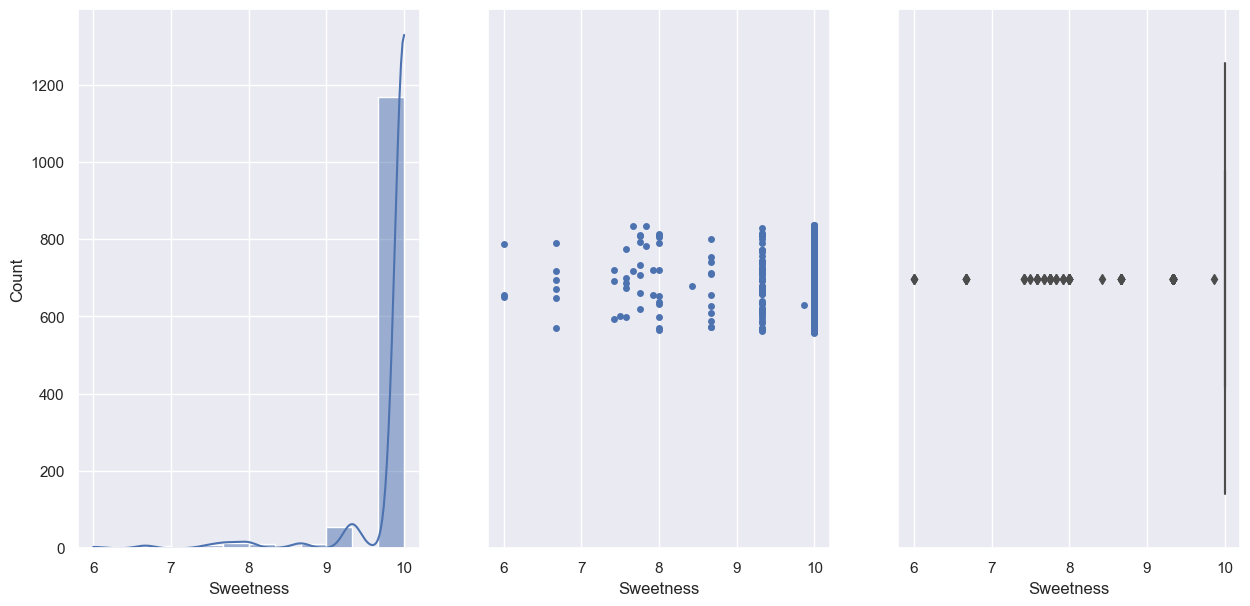

In [17]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Sweetness", kde=True, ax=axs[0])
sns.stripplot(x=df["Sweetness"], ax=axs[1])
sns.boxplot(data=df, x="Sweetness", ax=axs[2])

La distribución de la variable está prácticamente centralizada en el valor 10, con un pequeño grupo en el valor 9 y el resto en 8 o inferior.

La distribución no se aproxima a la normal.

Esta característica puede que no sea de mucha ayuda en la predicción, pues la práctica totalidad de los valores son el máximo.

<h4 style="text-align: center;"><ins>15 - Acidez</ins></h4>

<Axes: xlabel='Acidity'>

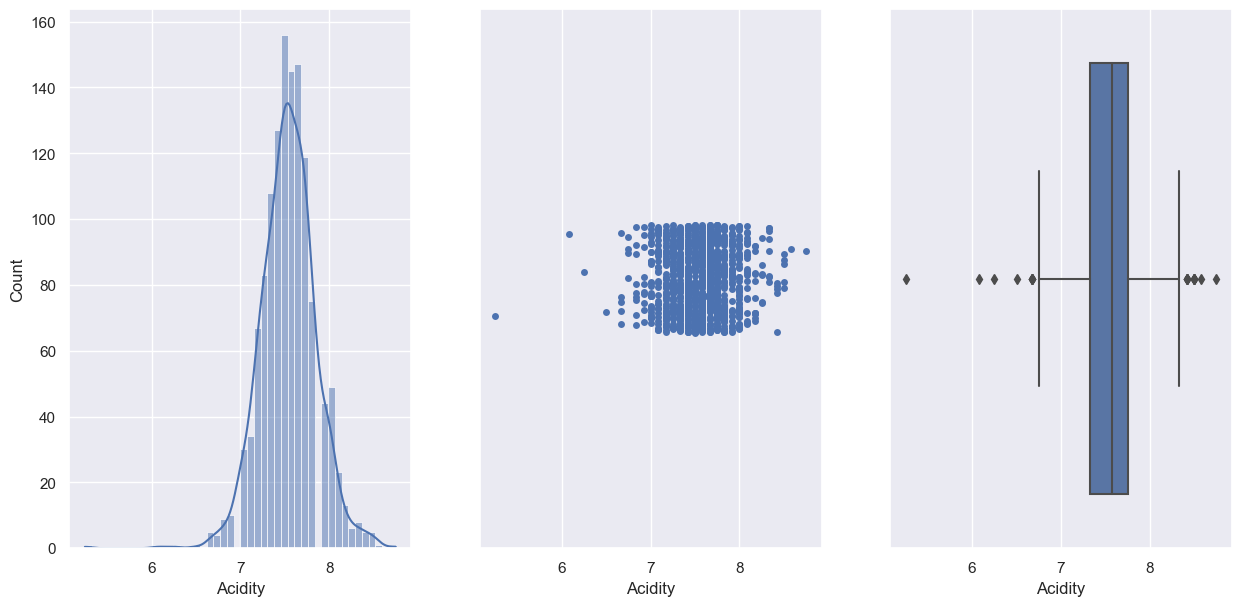

In [18]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Acidity", kde=True, ax=axs[0])
sns.stripplot(x=df["Acidity"], ax=axs[1])
sns.boxplot(data=df, x="Acidity", ax=axs[2])

De acuerdo a las gráficas de dispersión y distribución podemos inferir que los datos están concentrados en la horquilla de valores entre el 7 y el 8, con algunos valores fuera de ese rango pero válidos dentro de lo esperado.

La distribución, dada la gráfica y la posición de la mediana en el diagrama de caja, se aproxima a la normal.

<h4 style="text-align: center;"><ins>16 - Equilibrio</ins></h4>

<Axes: xlabel='Balance'>

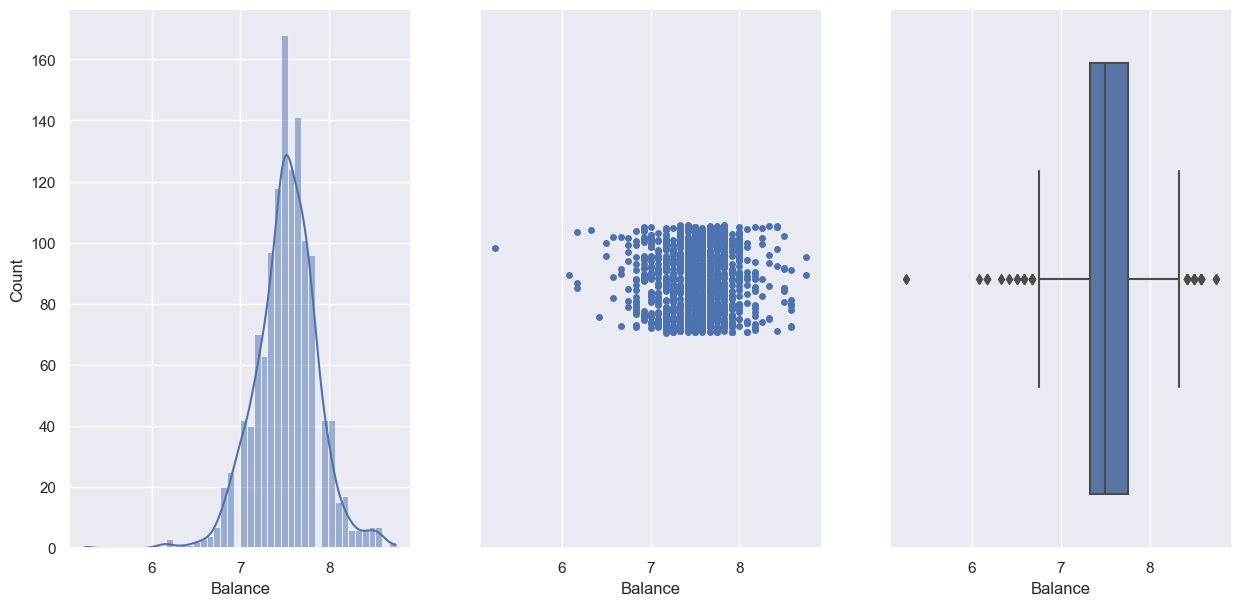

In [19]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Balance", kde=True, ax=axs[0])
sns.stripplot(x=df["Balance"], ax=axs[1])
sns.boxplot(data=df, x="Balance", ax=axs[2])

Examinando las gráficas se observa que los valores de la variable Balance se distribuyen alrededor de las puntuaciones 7 y 8, con algunos valores fuera de ese rango, pero perfectamente válidos.

La distribución, de acuerdo a la gráfica y a la posición de la mediana en el diagrama de caja, aunque no sigue una normal sí que se aproxima a ella.

<h4 style="text-align: center;"><ins>17 - Uniformidad</ins></h4>

<Axes: xlabel='Uniformity'>

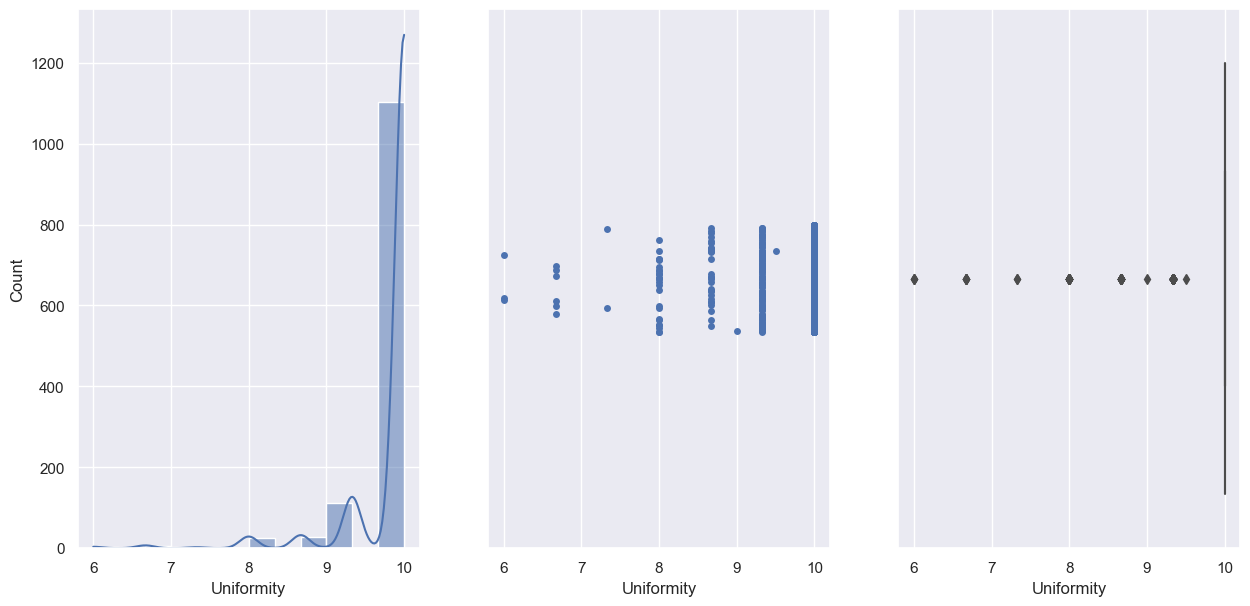

In [20]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Uniformity", kde=True, ax=axs[0])
sns.stripplot(x=df["Uniformity"], ax=axs[1])
sns.boxplot(data=df, x="Uniformity", ax=axs[2])

Como ya esperábamos tras el análisis de los datos de la variable Uniformity la distribución está entre la puntuación 9 y 10, muy alejada de una distribución normal.

Al igual que con la variable Sweetness, es posible que esta variable no nos sea de mucha ayuda a la hora de realizar la predicción, dado que la mayor parte de sus valores están en el máximo.

<h4 style="text-align: center;"><ins>18 - Clean Cup</ins></h4>

<Axes: xlabel='Clean.Cup'>

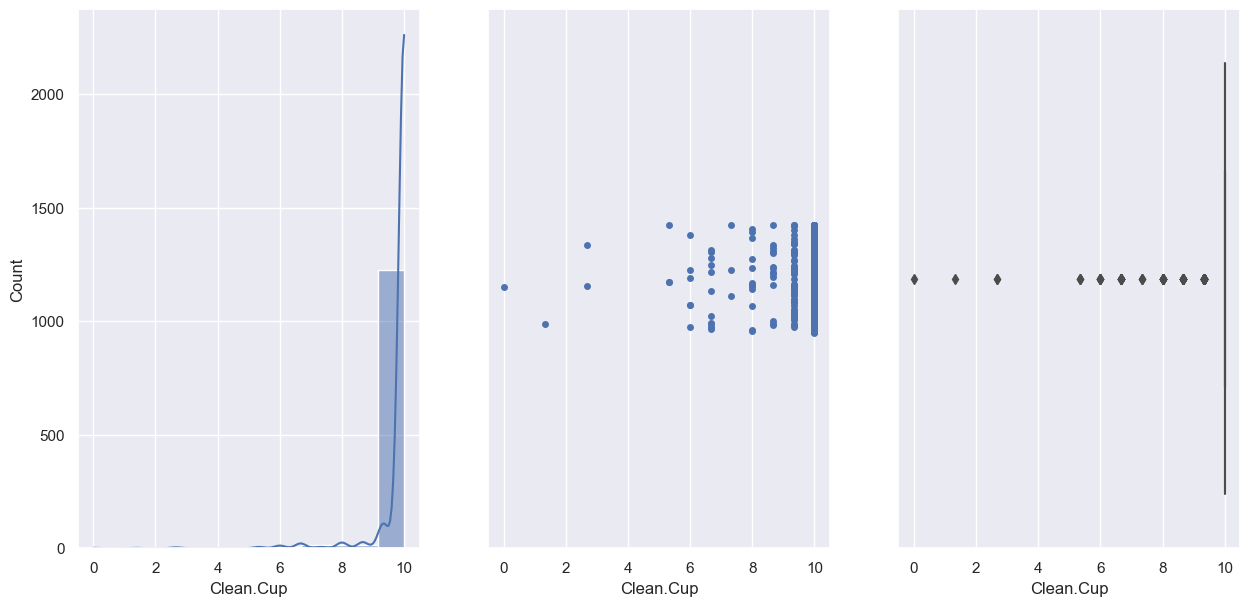

In [21]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Clean.Cup", kde=True, ax=axs[0])
sns.stripplot(x=df["Clean.Cup"], ax=axs[1])
sns.boxplot(data=df, x="Clean.Cup", ax=axs[2])

El análisis de los datos de la variable Clean Cup ya nos apuntaba que la distribución iba a estar entre la puntuación 9 y 10, muy alejada de una distribución normal. Además, tenemos la presencia de valores fuera de rango que no podemos tratar pues pueden ser correctos dada la característica.

Al igual que antes, es posible que esta variable no nos sea de mucha ayuda a la hora de realizar la predicción, dado que la mayor parte de sus valores están en el máximo.

<h4 style="text-align: center;"><ins>19 - Humedad</ins></h4>

<Axes: xlabel='Moisture'>

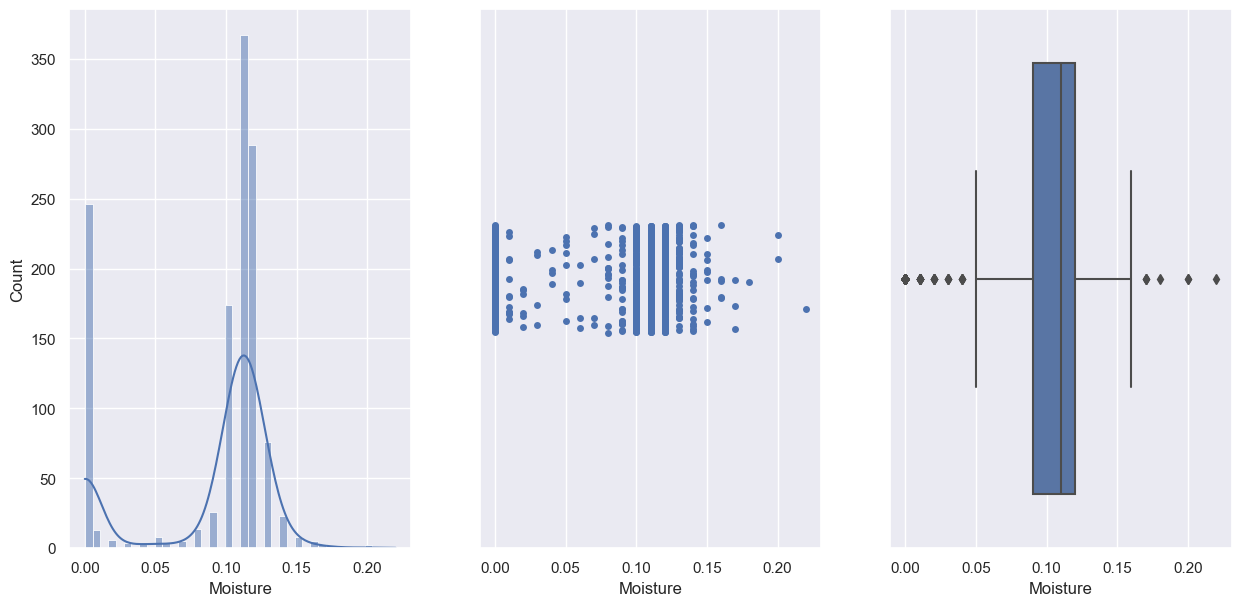

In [22]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Moisture", kde=True, ax=axs[0])
sns.stripplot(x=df["Moisture"], ax=axs[1])
sns.boxplot(data=df, x="Moisture", ax=axs[2])

De acuerdo a lo que podemos interpretar de las gráficas de distribución y dispersión, la mayor parte de los datos se encuentran entre los valores 0,10 y 0,15 de humedad, con un gran número de ellos también con el valor 0,00.

Seguimos pensando que el valor 0,00 de humedad es algo poco probable siendo semillas de café, pero no podemos realizar ningún cambio ni imputación.

<h4 style="text-align: center;"><ins>20 - Defectos Tipo 1</ins></h4>

Dado que en el análisis de los datos decidimos que era mejor realizar agrupamientos, este análisis univariante lo realizaremos sobre esos agrupamientos para una mayor claridad en el análisis.

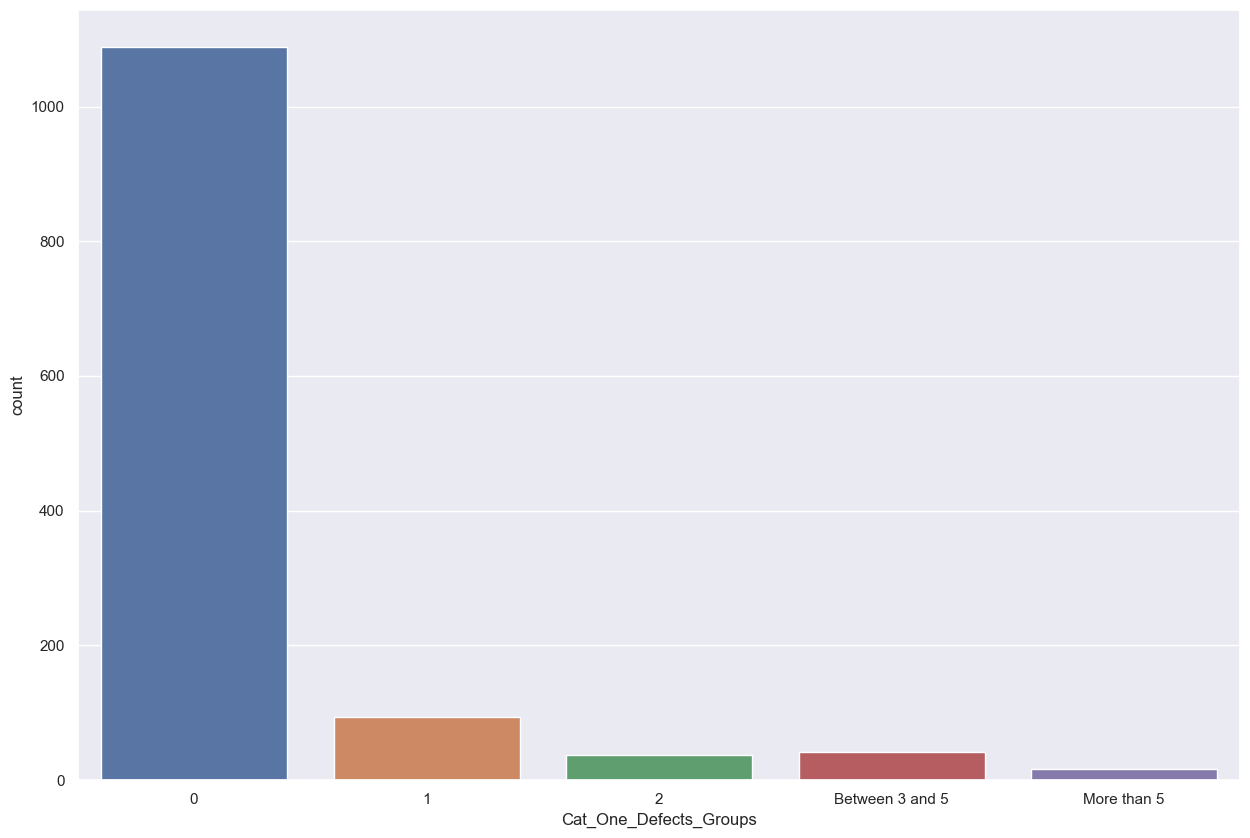

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="Cat_One_Defects_Groups", ax=ax)
plt.show()

Prácticamente todos los registros tienen un valor 0 para la variable de Defectos Tipo 1.

<h4 style="text-align: center;"><ins>21 - Defectos Tipo 2</ins></h4>

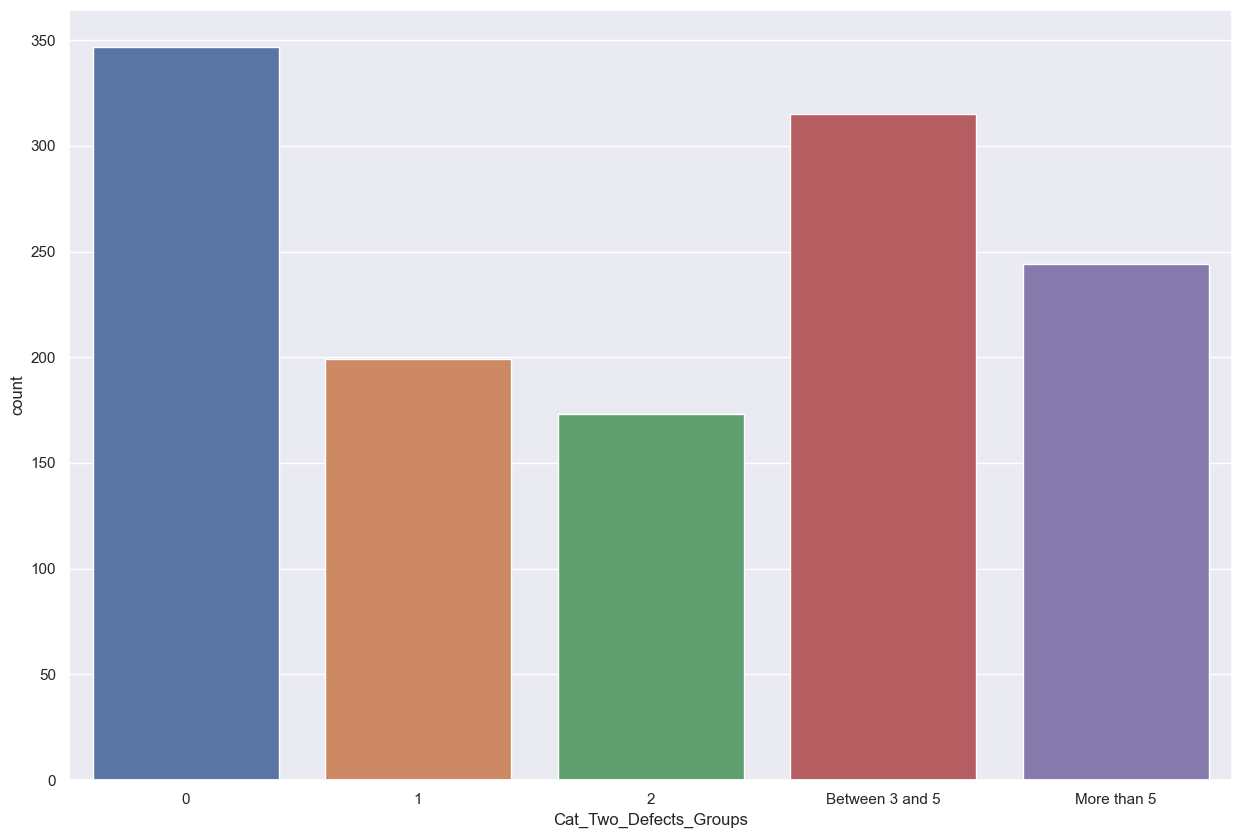

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="Cat_Two_Defects_Groups", ax=ax)
plt.show()

Podemos ver que para esta característica hay bastantes registros con un valor de 0 defectos, siendo el siguiente en cantidad los que presentan entre 3 y 5 defectos.

<h4 style="text-align: center;"><ins>22 - Total de puntos</ins></h4>

<Axes: xlabel='Total.Cup.Points'>

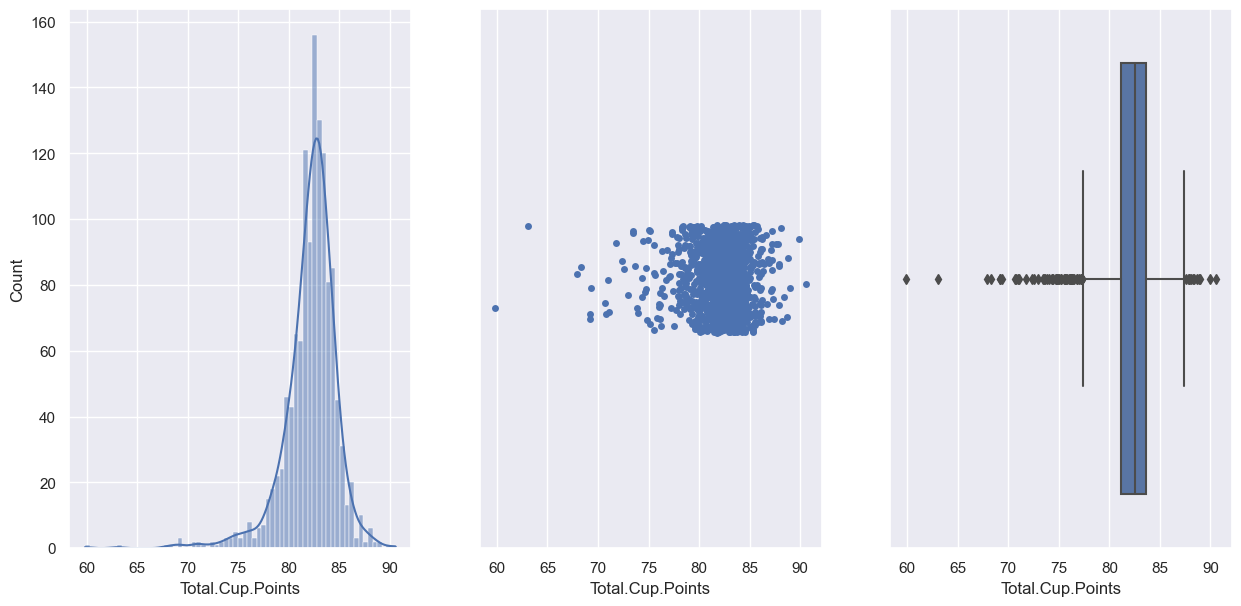

In [25]:
fig, axs = plt.subplots(figsize=(15, 7), ncols=3)
sns.histplot(data=df, x="Total.Cup.Points", kde=True, ax=axs[0])
sns.stripplot(x=df["Total.Cup.Points"], ax=axs[1])
sns.boxplot(data=df, x="Total.Cup.Points", ax=axs[2])